<a href="https://colab.research.google.com/github/PedroAVelezP/IA_AgoDic2024/blob/main/Assignments/Artificial_Neural_Network_feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# **Artificial Intelligence Class**
---
### **Name:** Pedro Alberto Velez Platas  
### **ID:** 1956896  
### **Career:** Biomedical Engineering  

---

### **Class:** Artificial Intelligence  
### **Professor:** Daniel Isaías López Páez  
### **Hour:** Tuesday N4-N6  
### **Group:** 001  

---

</center>



# **Assignment 6.- Artificial Neural Network: feedforward.**


**Goal.-**

To train a Feedforward Neural Network model.


**Instructions.-**

* The student will train a Feedforward Neural Network model in Google Colab using the Python programming language. This model will use the MNIST dataset; this dataset contains low-resolution images with handwritten digits from 0 to 9. The dataset is part of the Keras library. More information about this dataset: https://keras.io/api/datasets/mnist/

* During data preprocessing, the "load_data()" function from the Keras library will be used to load the dataset and generate the training (train_data, train_labels) and test (test_data, test_label) datasets. The default data split provided by this function can be used.

* A feedforward artificial neural network will be trained with the training data using the "fit" function from the scikit-learn library. The student will propose a structure for the feedforward artificial neural network. The activation function in the output layer should be softmax.

* The type of loss function and optimizer to be used will be established. The metric to evaluate the training process will be accuracy.

* Use the "evaluate" function to display the prediction accuracy of the model with the test dataset (test_data).

* Perform 5 different predictions with the test dataset (test_data). In the result, display the prediction and the actual value.








# Libraries


In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load data set

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Data preprocessing

In [ ]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Train

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


model.fit(train_data, train_labels, epochs=10, batch_size=32, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8760 - loss: 0.4238
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9688 - loss: 0.1035
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9788 - loss: 0.0712
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9833 - loss: 0.0524
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9867 - loss: 0.0415
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9890 - loss: 0.0344
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9898 - loss: 0.0295
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9932 - loss: 0.0210
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9937 - loss: 0.0188
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9941 - loss: 0.0164


# Model testing

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=0)
print(f'Precisión del modelo en el conjunto de prueba: {test_accuracy:.4f}')

Precisión del modelo en el conjunto de prueba: 0.9731


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Predicciones y valores reales:


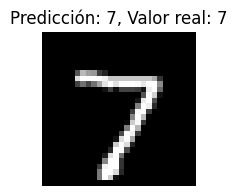

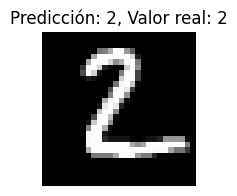

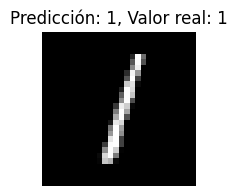

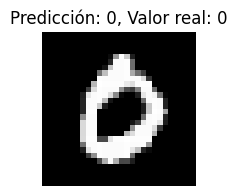

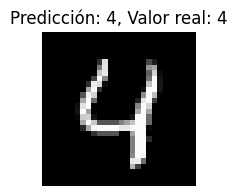

In [ ]:
predictions = model.predict(test_data[:5])
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(test_labels[:5], axis=1)

print("\nPredicciones y valores reales:")

for i in range(5):
    plt.figure(figsize=(2, 2))
    plt.imshow(test_data[i], cmap='gray')
    plt.title(f"Predicción: {predicted_classes[i]}, Valor real: {actual_classes[i]}")
    plt.axis('off')
    plt.show()